In [1]:
# Import libraries.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [3]:
# Prepare Data

In [4]:
## Use Pandas to read in each of the CSV files as a DataFrame. Be sure to convert the dates to a DateTimeIndex.

In [5]:
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [8]:
## Detect and remove null values.

In [9]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [10]:
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [11]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [13]:
## Remove dollar signs from the numeric values and convert the data types as needed.
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [14]:
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [15]:
sp500_history.dtypes

Close    object
dtype: object

In [16]:
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.dtypes
sp500_history['Close'] = sp500_history['Close'].pct_change()
sp500_history.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [17]:
## Detect and remove null values for S&P 500 Historic Prices.

In [18]:
sp500_history.isnull().sum()

Close    1
dtype: int64

In [19]:
sp500_history.dropna(inplace=True)
sp500_history.isnull().sum()

Close    0
dtype: int64

In [20]:
## The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P 500 CSV file contains closing prices. Convert the S&P 500 closing prices to daily returns.
sp500_history = sp500_history.rename(columns={
    "Close": "S & P 500"
})
sp500_history.head()

,S & P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [21]:
## Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_returns = pd.concat([whale_returns, algo_returns, sp500_history], axis="columns", join="inner")
joined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [22]:
# Conduct Quantitative Analysis

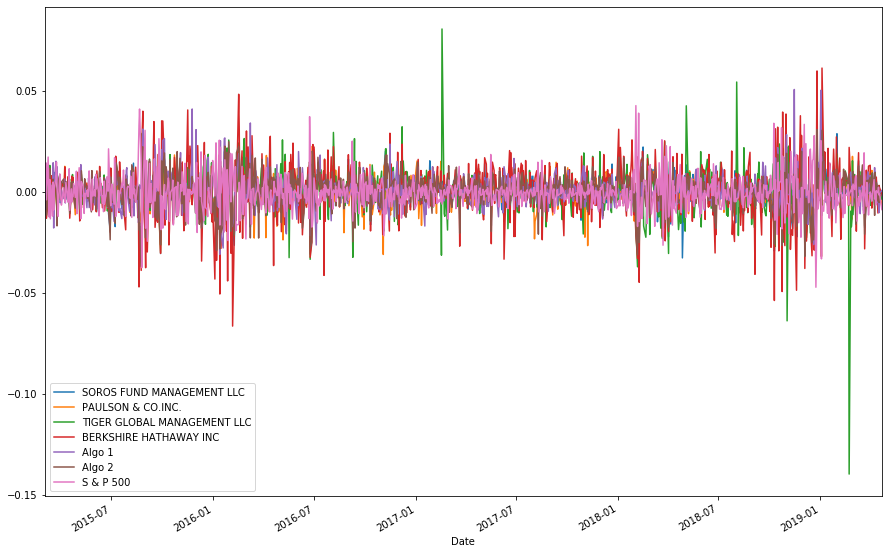

In [23]:
## Performance Analysis
### Calculate and plot cumulative returns. Does any portfolio outperform the S&P 500?
joined_returns.plot(figsize=(15,10))

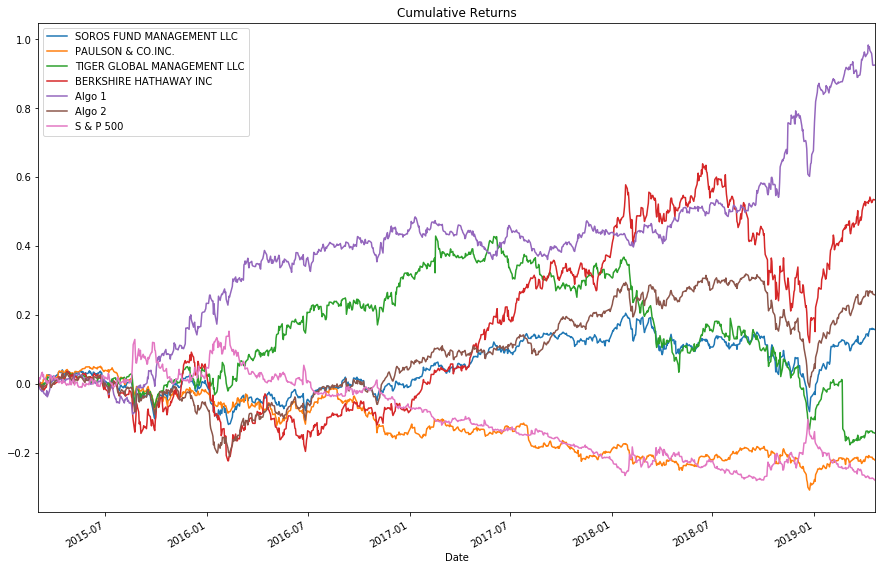

In [24]:
cumlative_returns = (1 + joined_returns).cumprod() -1
cumlative_returns.plot(figsize=(15,10), title='Cumulative Returns')

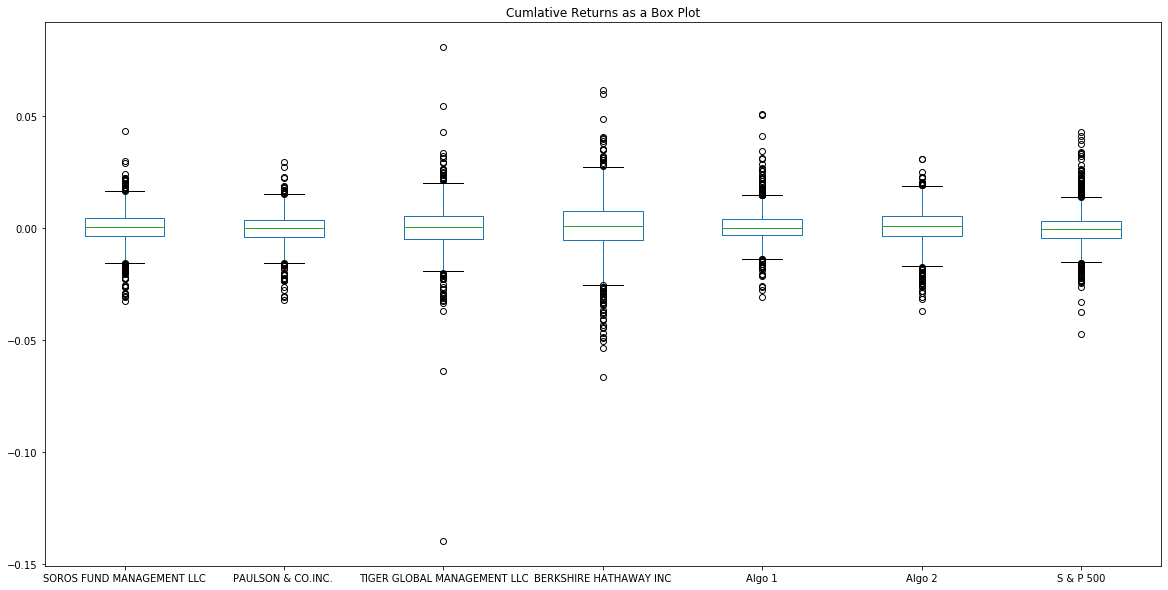

In [25]:
## Risk Analysis
### Create a box plot for each of the returns. Which box has the largest spread? Which has the smallest spread?
joined_returns.plot.box(figsize=(20,10), title='Cumlative Returns as a Box Plot')

In [26]:
###Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
daily_std = joined_returns.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S & P 500                      0.008587
dtype: float64


In [27]:
riskier = daily_std[daily_std > daily_std["S & P 500"]]
print(riskier)

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


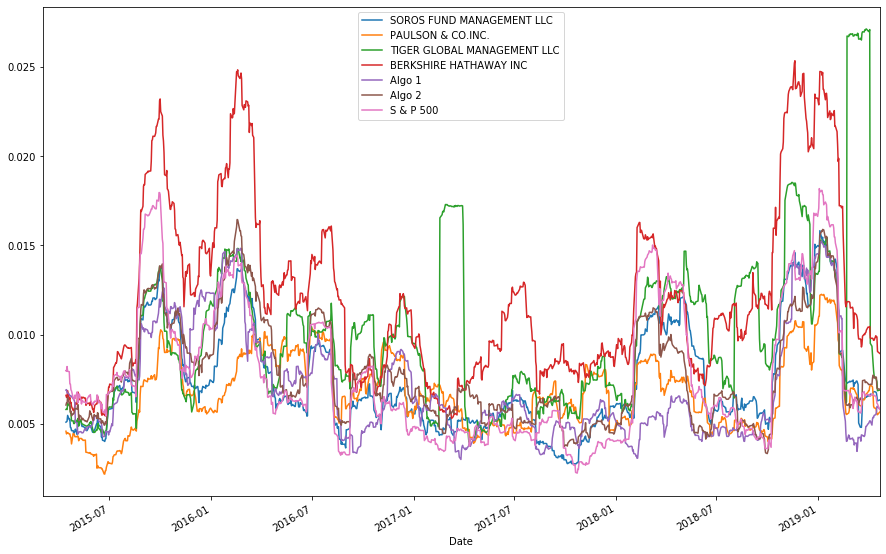

In [28]:
## Rolling Statistics
### Plot the rolling standard deviation of the firm's portfolios along with the rolling standard deviation of the S&P 500. Does risk increase for each of the portfolios at the same time risk increases in the S&P?
joined_returns.rolling(window=30).std().plot(figsize=(15,10))

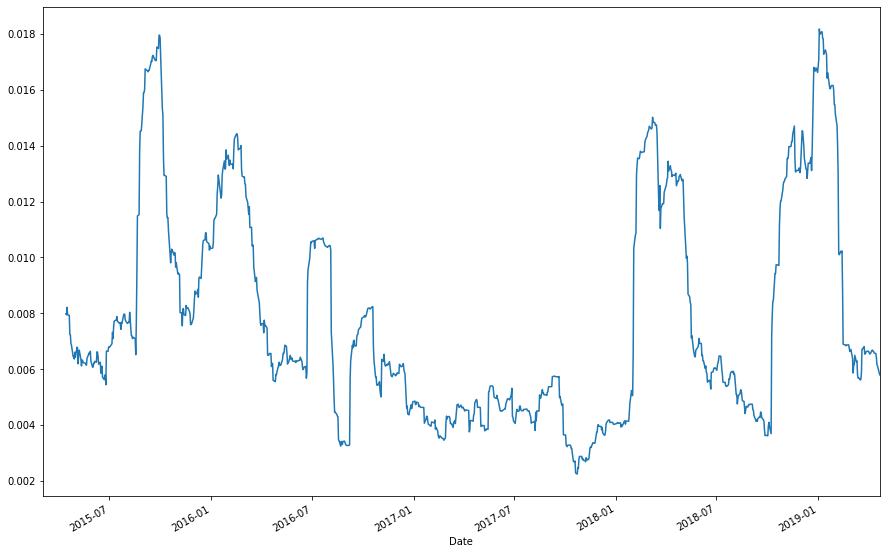

In [29]:
joined_returns['S & P 500'].rolling(window=30).std().plot(figsize=(15,10))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S & P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


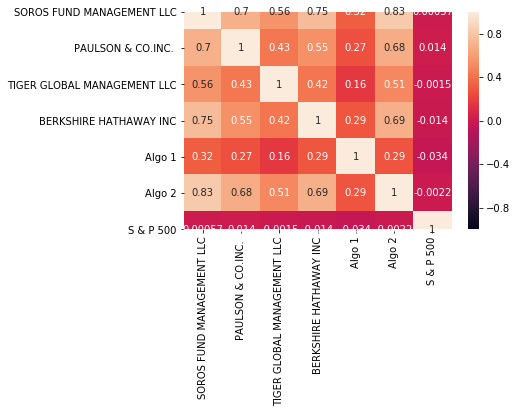

In [30]:
### Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
import seaborn as sns
correlation = joined_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
correlation

In [31]:
### Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
covariance = joined_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(joined_returns['S & P 500'])
variance = joined_returns['S & P 500'].var()
beta = covariance / variance
beta

-0.0019097027512372758

In [32]:
## Plot Sharpe Ratios
### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
sharpe_ratios = (joined_returns.mean() * 252) / (joined_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

S & P 500                     -0.518582
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

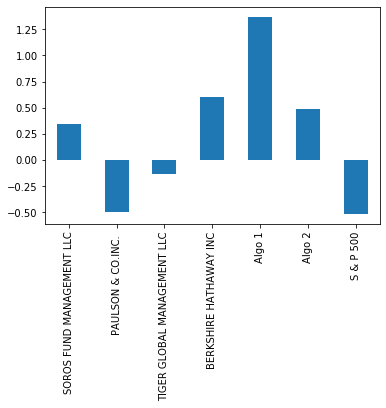

In [33]:
sharpe_ratios.plot.bar()